In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential

# Load VGG16 pretrained model

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
base_model.output_shape

(None, 7, 7, 512)

In [6]:
for layer in base_model.layers:
    layer.trainable = False

# Failed to run with Sequential API

In [7]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3-class classification
])

In [8]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
Model(intputs = base_model.inputs, outputs = model.layers[-1].output)

ValueError: The layer dense_1 has never been called and thus has no defined output.

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model weights

# Build the Sequential model
model = Sequential([
    base_model,                               # Pre-trained VGG16
    GlobalAveragePooling2D(),                 # Pooling to flatten 4D tensor
    Dense(256, activation='relu'),            # Fully-connected layer
    Dense(1, activation='sigmoid')            # Output layer
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# Works with Functional API

In [94]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model weights

# Functional API
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False) # Pass through base model    
x = Flatten()(x)
outputs = Dense(2, activation='sigmoid')(x)    # Output layer

model = Model(inputs, outputs)
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
model.weights

[<KerasVariable shape=(3, 3, 3, 64), dtype=float32, path=block1_conv1/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=block1_conv1/bias>,
 <KerasVariable shape=(3, 3, 64, 64), dtype=float32, path=block1_conv2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=block1_conv2/bias>,
 <KerasVariable shape=(3, 3, 64, 128), dtype=float32, path=block2_conv1/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=block2_conv1/bias>,
 <KerasVariable shape=(3, 3, 128, 128), dtype=float32, path=block2_conv2/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=block2_conv2/bias>,
 <KerasVariable shape=(3, 3, 128, 256), dtype=float32, path=block3_conv1/kernel>,
 <KerasVariable shape=(256,), dtype=float32, path=block3_conv1/bias>,
 <KerasVariable shape=(3, 3, 256, 256), dtype=float32, path=block3_conv2/kernel>,
 <KerasVariable shape=(256,), dtype=float32, path=block3_conv2/bias>,
 <KerasVariable shape=(3, 3, 256, 256), dtype=float32, path=block3_conv3/kernel>,
 <KerasVariabl

In [14]:
import cv2
import os
import matplotlib.pyplot as plt

In [53]:
PATH = '/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/cats/'
TRAIN_PATH = '/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/cats/'
VAL_PATH = '/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/data/val/'

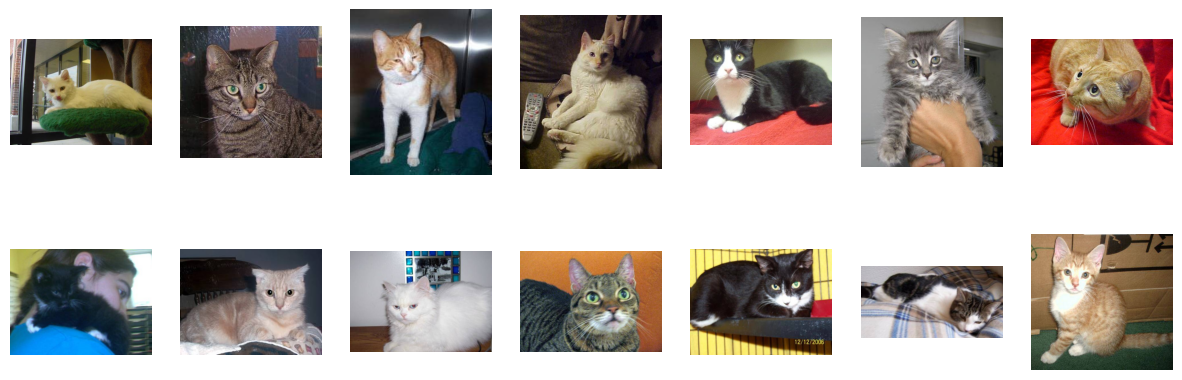

In [54]:
plt.figure(figsize=(15,5))
for i, filename in enumerate(os.listdir(TRAIN_PATH)):
    if i == 14:
        break
    path = TRAIN_PATH + filename
    image = plt.imread(path)
    
    plt.subplot(2, 7, i+1)
    
    plt.axis('off')
    plt.imshow(image)
    
plt.show()
    

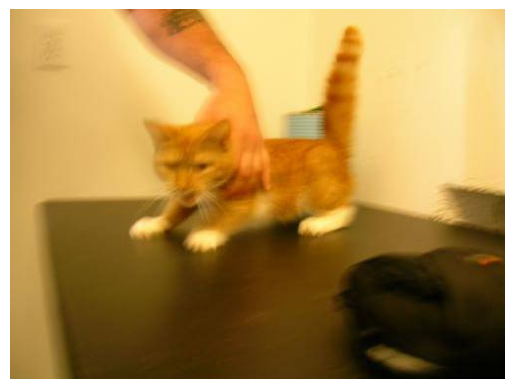

In [40]:
image = cv2.imread('/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/cats/cat.0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image)

In [111]:
X_train = []
y_train = []

TRAIN_PATH = '/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/cats/'

for i, filename in enumerate(os.listdir(TRAIN_PATH)):
    path = TRAIN_PATH + filename
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    X_train.append(image)
    y_train.append('cat')

TRAIN_PATH = '/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/dogs/'

for i, filename in enumerate(os.listdir(TRAIN_PATH)):
    path = TRAIN_PATH + filename
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    X_train.append(image)
    y_train.append('dog')

In [76]:
X_train = np.asarray(X_train)

In [95]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [112]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [96]:
model.compile(optimizer='adam', 
              loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

In [97]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10)  # Huấn luyện với batch size 10

Epoch 1/10
 93/200 ━━━━━━━━━━━━━━━━━━━━ 4:57 3s/step - accuracy: 0.8587 - loss: 4.9159

KeyboardInterrupt: 

In [150]:
def predict_image(image):
    resized_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    y_pred = model.predict(resized_image.reshape(-1, 224, 224, 3))
    class_pred = encoder.inverse_transform([np.argmax(y_pred)])[0]
    plt.figure(figsize = (12, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(class_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


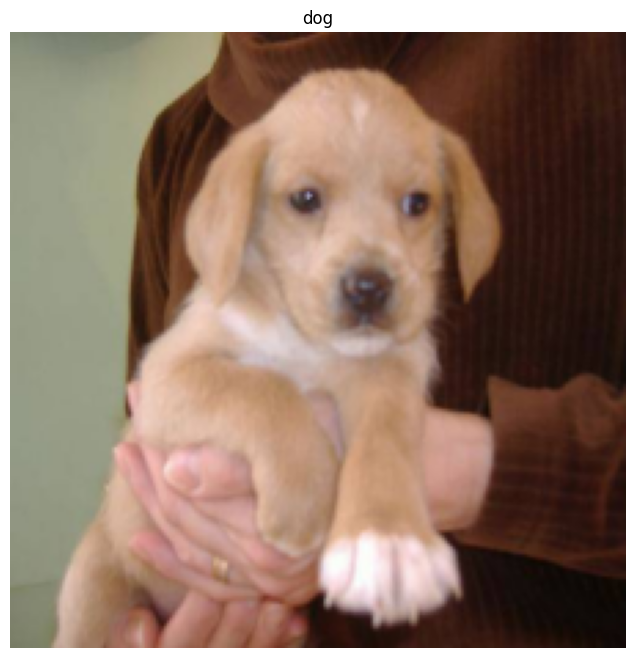

In [153]:
image = cv2.imread('/kaggle/input/dogs-and-cats/cats_and_dogs_filtered/train/dogs/dog.103.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

predict_image(image)